In [20]:
import sys
import os
sys.path.append('../../ThumbStack')
sys.path.append('../../LensQuEst')
import importlib

import flat_map
importlib.reload(flat_map)
from flat_map import *

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import fitsio
import pixell
importlib.reload(pixell)
from functools import partial

In [21]:
plt.style.use('default.mplstyle')

def colorbar(mappable):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib.pyplot as plt
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.sca(last_axes)
    return cbar

In [22]:
sys.path.append('../scripts/')
from make_noise_maps import make_cmb, gen_lensed_map, gen_map_from_curve

In [23]:
kappa_fits = '/home/theo/Documents/research/CMB/patchy_tau_sims/output/fg_maps/kappamap_0.53arcminGauss_correlatedwithTaumap_cmass_10x10_image.fits'
lensmap = gen_lensed_map(kappa_fits, 'lencmb0')

Generating map


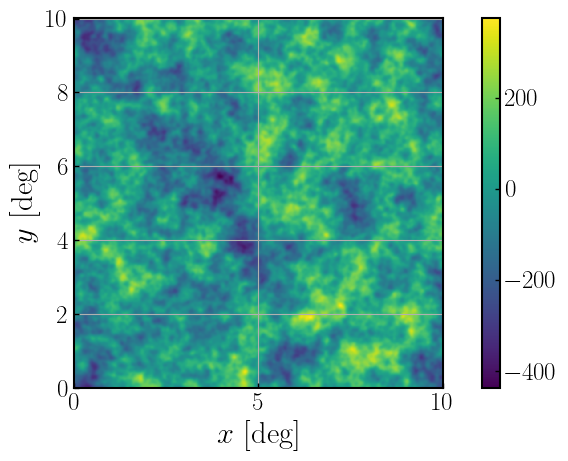

In [24]:
lensmap.plot()

[]

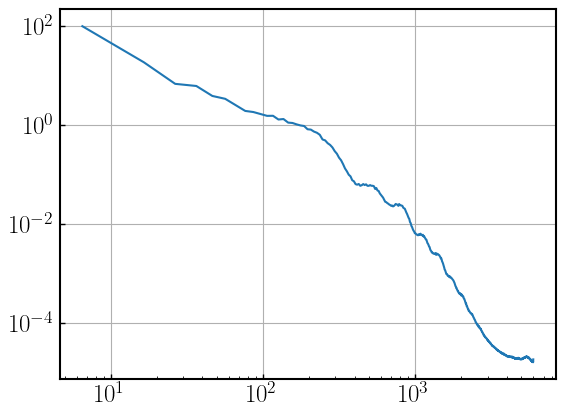

In [25]:
datadir = '/home/theo/Documents/research/CMB/patchy_tau_sims/data/AdvACT_NILC_cls_fullRes_TT/'
ell = np.load(datadir+'ells.npy')
cl = np.load(datadir+'cl_tt.npy')
cmb = make_cmb()
plt.plot(ell, cl)
plt.loglog()

In [26]:
actmap = gen_map_from_curve(ell, cl, cmb, lensmap, name='actnilc')

Generating map


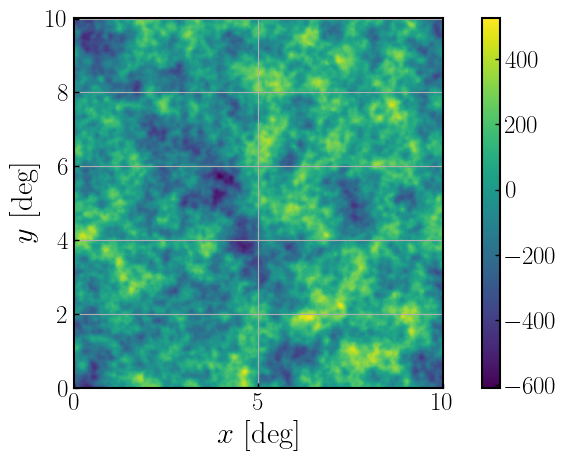

In [27]:
actmap.plot()

/home/theo/Documents/research/CMB/patchy_tau_sims/notebooks/../../ThumbStack/flat_map.py:459: RuntimeWarning: invalid value encountered in divide
  sCl /= np.sqrt(Nmodes)


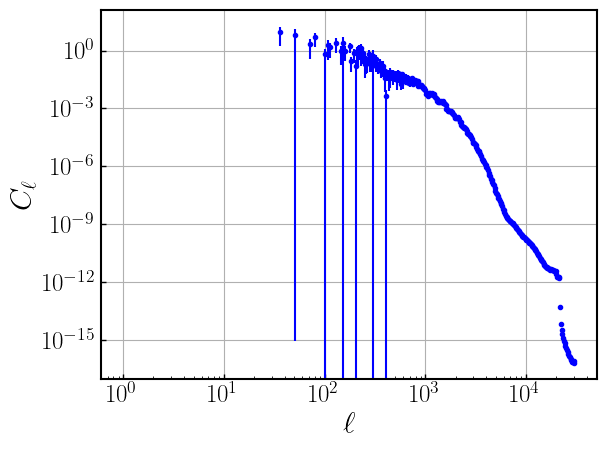

In [28]:
lens_ell, lens_cl, lens_scl = lensmap.powerSpectrum(nBins=600, plot=True)

In [29]:
print(len(ell))
print(len(lens_ell))

599
599


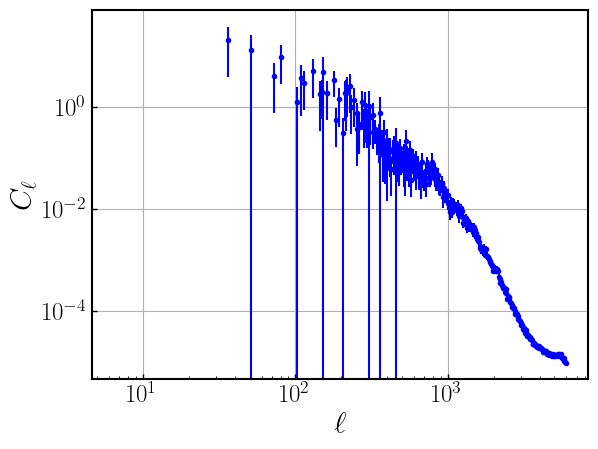

In [30]:
act_ell, act_cl, act_scl = actmap.powerSpectrum(lRange=ell, nBins=600, plot=True)

In [31]:
lmax = 2150
lmin = 30
lpf = (act_ell < 2150) & (act_ell > 30)
ellpf = (ell < 2150) & (ell > 30)
lens_intg = np.sum(lens_cl[lpf]) / (2150-np.min(act_ell))
act_intg = np.sum(act_cl[lpf]) / (2150-np.min(act_ell))
print(lens_intg, act_intg, act_intg/lens_intg/2)

0.02374163390177659 0.048638745991821254 1.0243344285622569


Text(0, 0.5, '$C_{\\ell}$')

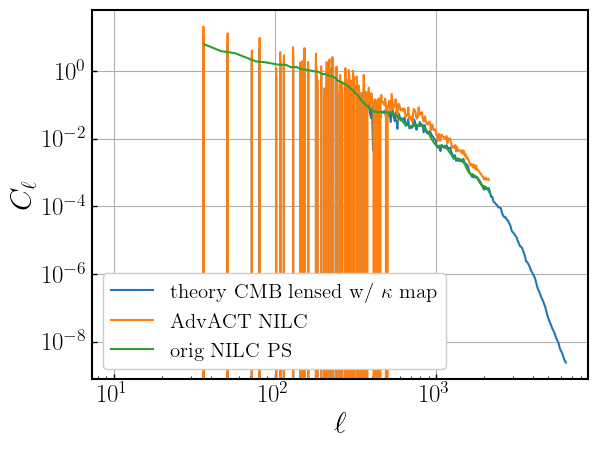

In [32]:
plt.plot(lens_ell[lpf], lens_cl[lpf], label=r'theory CMB lensed w/ $\kappa$ map')
plt.plot(act_ell[lpf], act_cl[lpf], label='AdvACT NILC')
# plt.plot(lens_ell[lpf], lens_cl[lpf]*2, label=r'lensed theory CMB $\times$ 2', ls=':')
plt.plot(ell[ellpf], cl[ellpf], label=r'orig NILC PS')
plt.loglog()
plt.legend(framealpha=1., fontsize=15)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}$')

In [30]:
act_cl[lpf] / lens_cl[lpf] / 2

/tmp/ipykernel_11869/445874003.py:1: RuntimeWarning: invalid value encountered in divide
  act_cl[lpf] / lens_cl[lpf] / 2


array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan, 1.05395716,        nan,        nan,
       1.02242006,        nan, 0.96227873, 0.9455405 ,        nan,
       0.97621019, 0.9571701 , 0.941043  , 0.94710793, 0.95724856,
       0.95639578, 0.95470929, 0.94777513, 0.94668998, 0.9400685 ,
       0.99084339, 1.00946669, 0.96390936, 0.94291481, 1.02398526,
       0.97070074, 0.89883128, 0.99879828, 0.91125453, 0.96147055,
       0.93001346, 0.93308109])

In [40]:
lens_intg = np.sum(lens_cl[lpf]) / (2150-np.min(act_ell))
act_intg = np.sum(cl[(ell<2150) & (ell>30)] / (2150-30))
print(lens_intg, act_intg, act_intg/lens_intg)

0.01549456928425215 0.019589853350896216 1.2643044792994855


In [8]:
flensedtt = cmb.flensedTT_template(ell) * cmb.fdl_to_cl(ell)

(0.0001, 100.0)

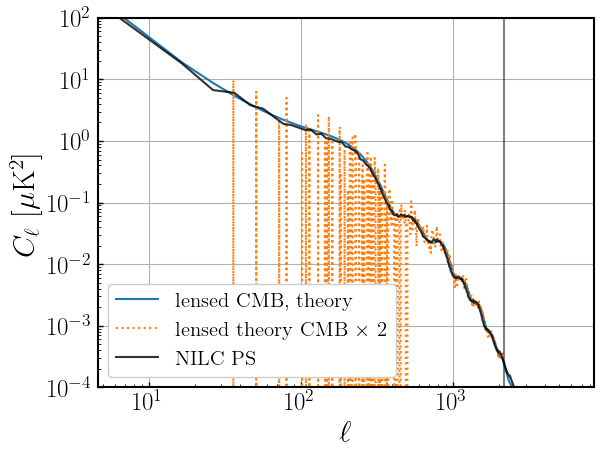

In [87]:
plt.plot(ell, ell**2*flensedtt, label=r'lensed CMB, theory')
# plt.plot(act_ell[lpf], act_cl[lpf], label='AdvACT NILC')
plt.plot(lens_ell[lpf], lens_cl[lpf], label='lensed theory CMB')
plt.plot(ell, cl, label=r'NILC PS', c='k', alpha=0.8)
plt.axvline(2150, c='k', alpha=0.5)
plt.loglog()
plt.legend(framealpha=1., fontsize=15)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}$ [$\mu$K$^2$]')
plt.ylim(1e-4, 1e2)

In [11]:
print(min(ell), max(ell), max(ell[ell < 2150]))
lmin=30
lmax = 2150
print(np.sum(flensedtt[(ell > lmin) & (ell < lmax)]))
print(np.sum(cl[(ell > lmin) & (ell < lmax)]))
print(np.sum(lens_cl[(lens_ell > 30) & (lens_ell < 2150)]) / (2150-30))
print(np.sum(flensedtt[(ell > lmin) & (ell < lmax)]) / np.sum(cl[(ell > lmin) & (ell < lmax)]))

6.5 5986.5 2146.5
43.34111248249731
41.53048910389997
0.024003499774307966
1.0435974489505184


In [12]:
from pn_2d import interp1d
fltt_interp = interp1d(ell, flensedtt, kind='linear', bounds_error=False, fill_value=0.)
cl_interp = interp1d(ell, cl, kind='linear', bounds_error=False, fill_value=0.)
klens_interp = interp1d(lens_ell, lens_cl, kind='linear', bounds_error=False, fill_value=0.)

(1000.0, 97015.68004324146)

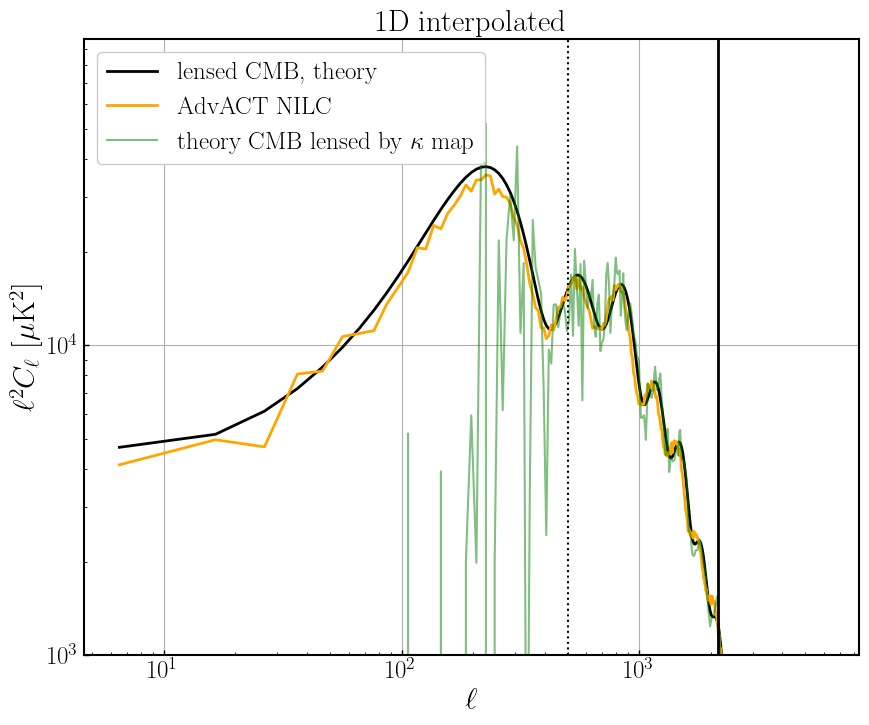

In [18]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
plt.plot(ell, ell**2*fltt_interp(ell), label=r'lensed CMB, theory', lw=2, c='k')
# plt.plot(act_ell[lpf], act_cl[lpf], label='AdvACT NILC')
# plt.plot(lens_ell[lpf], lens_cl[lpf]*2, label=r'lensed theory CMB $\times$ 2', ls=':')
plt.plot(ell, ell**2*cl_interp(ell), label=r'AdvACT NILC', c='orange', lw=2)
plt.plot(ell, ell**2*klens_interp(ell), label=r'theory CMB lensed by $\kappa$ map', c='g', alpha=0.5)
plt.axvline(2150, c='k', lw=2)
plt.axvline(500, c='k', lw=1.5, ls=':')
plt.loglog()
plt.legend(framealpha=1., fontsize=18)
plt.title('1D interpolated')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell^2C_{\ell}$ [$\mu$K$^2$]')
plt.ylim(ymin=1e3)

In [139]:
print(min(ell), max(ell), max(ell[ell < 2150]))
ell_range = ell[(ell > 500) & (ell < 2150)]
print(np.sum(fltt_interp(ell_range)))
print(np.sum(cl_interp(ell_range)))
print(np.sum(klens_interp(ell_range)))
print(np.sum(fltt_interp(ell_range) / np.sum(cl_interp(ell_range))))
print(np.sum(fltt_interp(ell_range) / np.sum(klens_interp(ell_range))))
print(np.sum(klens_interp(ell_range) / np.sum(cl_interp(ell_range))))

6.5 5986.5 2146.5
1.6498733680913247
1.5686966612045445
1.6228762544519506
1.0517478674458627
1.016635349470001
1.0345379668277


In [121]:
print(min(ell), max(ell), max(ell[ell < 2150]))
ell_range = ell[(ell > 100) & (ell < 2150)]
print(np.sum(fltt_interp(ell_range)))
print(np.sum(cl_interp(ell_range)))
# print(np.sum(klens_interp(ell_range))) # kappa lensed map too small to probe low ell
print(np.sum(fltt_interp(ell_range) / np.sum(cl_interp(ell_range))))
# print(np.sum(fltt_interp(ell_range) / np.sum(klens_interp(ell_range))))

6.5 5986.5 2146.5
22.32607696354961
20.469317102166933
1.0907094189862403
